# Лабораторная работа 8. ОДУ.

Загрузим необходимые для работы библиотеки: 

In [ ]:
import numpy as np
import math
import scipy
import sympy as sm
from sympy import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from matplotlib.patches import Polygon
init_printing()

from scipy.integrate import ode
from sympy.plotting import plot3d_parametric_line

# 1. Интегралы.

Определённый интеграл $\int_a^b f(x)\mathrm{d}x$ численно равен площади фигуры, ограниченной осью абсцисс, прямыми $x=a$ и $x=b$ и графиком функции $f(x)$.

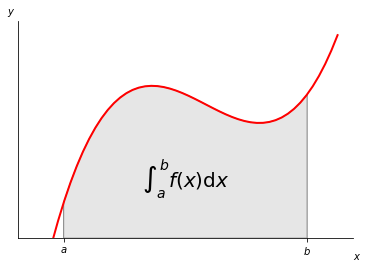

In [ ]:
def func(x):
    return (x - 3) * (x - 5) * (x - 9) + 85

a, b = 1, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)

#ix2 = ix[::-1]
#iy2 = func2(ix2)

verts = [(a, 0), *zip(ix, iy), (b, 0)]
#verts = [*zip(ix, iy), *zip(ix2, iy2)]

poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

# 1.1 Численное нахождение определённого интеграла

# Формула прямоугольников

(https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2)

In [ ]:
def rectangular(f, a, b, n):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы прямоугольников
    f - подынтегральная функция
    a, b - пределы интегрирования
    n - количество частичных отрезков
    """
    h = float(b - a)/n
    result = f(a+0.5*h)
    for i in range(1, n):
        result += f(a + 0.5*h + i*h)
    result *= h
    return result

# Формула трапеции

(https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%82%D1%80%D0%B0%D0%BF%D0%B5%D1%86%D0%B8%D0%B9)

In [ ]:
def trapezoidal(f, a, b, n):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций
    f - подынтегральная функция
    a, b - пределы интегрирования
    n - количество частичных отрезков
    """
    h = float(b - a)/n
    result = 0.5*(f(a) + f(b))
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result

# Пример.

Вычислим приближенное значение интеграла $\int_0^1 3x^2e^{x^3}\mathrm{d}x$ с помощью формулы трапеций:

In [ ]:
v = lambda x: 3*x**2*exp(x**3)
n = 4
I = trapezoidal(v, 0, 1, n)
I.n()

Давайте вычислим точное значение этого интеграла:

In [ ]:
V = lambda x: exp(x**3)
exact = V(1) - V(0)
exact.n()

Найдём разность этих выражений (погрешность)

In [ ]:
(exact - I).n()

Чтобы улучшить точность можно увеличить количество частичных отрезков:

In [ ]:
I = trapezoidal(v, 0, 1, n = 500)
(exact - I).n()

Сравнение формул трапеций и прямоугольников

In [ ]:
g = lambda x: exp(-x**2)
a = 0; b = 2
print ('%7s %22s %22s %22s' % ('n', 'прямоугольники', 'трапеции', 'разница'))
for i in range(1, 12):
    n = 2**i
    r = rectangular(g, a, b, n)
    t = trapezoidal(g, a, b, n)
    print ('%7d %22.16f %22.16f %22.16f' % (n, r, t, abs(r-t)))

      n         прямоугольники               трапеции                разница
      2     0.8842000076332692     0.8770372606158094     0.0071627470174598
      4     0.8827889485397279     0.8806186341245393     0.0021703144151886
      8     0.8822686991994210     0.8817037913321336     0.0005649078672874
     16     0.8821288703366458     0.8819862452657770     0.0001426250708688
     32     0.8820933014203766     0.8820575578012113     0.0000357436191652
     64     0.8820843709743319     0.8820754296107942     0.0000089413635377
    128     0.8820821359746071     0.8820799002925637     0.0000022356820434
    256     0.8820815770754197     0.8820810181335849     0.0000005589418348
    512     0.8820814373412922     0.8820812976045025     0.0000001397367897
   1024     0.8820814024071774     0.8820813674728967     0.0000000349342806
   2048     0.8820813936736116     0.8820813849400391     0.0000000087335725


# 1.2. Двойной интеграл

Рассмотрим вопросы численного нахождения двойного интеграла по прямоугольной области $[a,b] \times [c, d]$:
$$\int_a^b \int_c^d f(x, y) dydx.$$
Удобно представить двойной интеграл через два интеграла, каждый из которых будет вычисляться от функции одной переменной и может быть найден с помощью уже известных нам методов. С этой целью введем вспомогательную функцию g(x):
$$\int_a^b\int_{c}^d f(x, y) dydx = \int_a^b g(x) dx, \quad g(x) = \int_c^d f(x, y) dy.$$
Таким образом имеем два интеграла:
$$\int_a^b g(x) dx, \quad  \int_c^d f(x, y) dy.$$

Для нахождения каждого из них можно использовать формулу прямоугольников, объединяя формулы по каждому направлению, получим составную формулу прямоугольников для двойного интеграла:
$$\int_a^b f(x, y) dydx \approx \sum_{i=0}^{N_x - 1} h_x \sum_{i =
0}^{N_y - 1} h_y f(x_i, y_i)$$

In [ ]:
def rectangular_double(f, a, b, c, d, nx, ny):
    """
    Вычисляет значение двойного интеграла по формуле прямоугольников
    при реализации двойной суммы
    f - подынтегральная функция
    a, b, c, d - границы прямоугольной области интегрирования
    nx, ny - количество частичных отрезков по x и y соответственно
    """
    hx = (b - a)/float(nx)
    hy = (d - c)/float(ny)
    I = 0
    for i in range(nx):
        for j in range(ny):
            xi = a + hx/2 + i*hx
            yj = c + hy/2 + j*hy
            I += hx*hy*f(xi,yj)
    return I

Пример. Вычислим интеграл: $\int_2^3\int_0^2 (2x + y) dxdy.$

Введём соответствующие переменные и рассмотрим символьное выражение: 

In [ ]:
x, y = symbols("x y")
F = 2*x + y

In [ ]:
integrate(F, (y, 2, 3), (x, 0, 2))

Сравним это значение с результатом работы нашей программы rectangular_double()

In [ ]:
f = lambda x, y: 2*x + y

In [ ]:
rectangular_double(f, 0, 2, 2, 3, 5, 5)

# 2. Обыкновенные дифференциальные уравнения. 

# 2.1. Задача Коши

# Программа интегрирования явным методом Эйлера.

(https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0)

In [ ]:
def solveOdeEL(n,fun,x0,xk,y0,N,par):
    
    y = np.zeros((n+1,N))
    
    h=(xk-x0)/N
    
    i=0 
    y[0,0] = x0
    y[1:n+1,0]=y0[0:n]
   
    x=x0
    for i in range (1, N):
        
        f=fun(x,y[1:n+1,i-1],par)
        x=x+h              
        y[0,i] = x
        y[1:n+1,i]=y[1:n+1,i-1] + h*f[0:n]
        
    return y

# Программа интегрирования явным методом Рунге-Кутты 2-го порядка.

(https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B)

In [ ]:
def solveOdeRK2(n,fun,x0,xk,y0,N,par):
    
    y = np.zeros((n+1,N))
    
    h=(xk-x0)/N
    
    i=0 
    y[0,0] = x0
    y[1:n+1,0]=y0[0:n]
   
    x=x0
    for i in range (1, N):
        
        k1=fun(x,y[1:n+1,i-1],par)
        k1=y[1:n+1,i-1] + 0.5*h*k1[0:n]
        k2=fun(x+0.5*h,k1,par)
        x=x+h              
        y[0,i] = x
        y[1:n+1,i]=y[1:n+1,i-1] + h*k2[0:n]
        
    return y

# Векторное поле.

(https://pyprog.pro/mpl/mpl_streamplot.html)

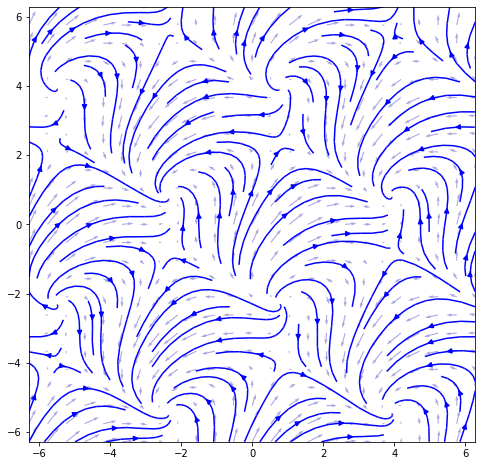

In [ ]:
fig, ax = plt.subplots()

Y, X = np.mgrid[-2*np.pi:2*np.pi:20j,
                -2*np.pi:2*np.pi:20j]
U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

#  Строим поток векторов:
ax.streamplot(X, Y, U, V, 
              color = 'b')

X, Y = np.mgrid[-2*np.pi:2*np.pi:25j,
                -2*np.pi:2*np.pi:25j]
U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

#  Поверх потока строим векторное поле:
ax.quiver(X, Y, U, V, 
          color = '#2011af60')    #  RGBA

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

# Анимация.

In [ ]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

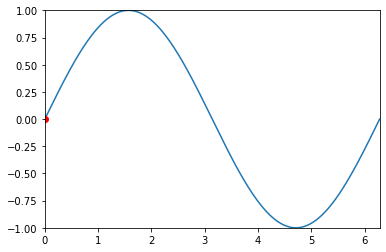

In [ ]:
fig3 = plt.figure()

TWOPI = 2*np.pi

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
sin_ani = animation.FuncAnimation(fig3, animate, frames=np.arange(0.0, TWOPI, 0.01), interval=50, blit=True, repeat=True)

#sin_ani.save('sin.mp4', writer=writer, dpi=300)
#sin_ani.save('sin.gif', writer='imagemagick', fps=30)

# Пример 1. Моделирование Солнечной системы.

Система дифференциальных уравнений задачи 2-х тел:

In [ ]:
def fgrav(x,y,par):
    # x - независимая переменная
    # y - зависимые переменные
    # par - вектор параметров
        
    f  = np.zeros(6)
    
    x2=y[0]*y[0]
    y2=y[1]*y[1]
    z2=y[2]*y[2]
    r2=x2+y2+z2;
    r=sqrt(r2);
    r1=1/r;
    r3=r1/r2;
    
    f[0]=y[3];
    f[1]=y[4];
    f[2]=y[5];
    
    f[3]=-y[0]*r3;
    f[4]=-y[1]*r3;
    f[5]=-y[2]*r3; 
    
    return f

Система измерений и исходные данные

In [ ]:
AU     = 1.49597870691e8;  # km

fM_Sun = 1.32712440018e11; # km^3/sec^2
fM_Mer = fM_Sun/6023600.0  # km^3/sec^2
fM_Ven = fM_Sun/408523.71  # km^3/sec^2
fM_EarMoon = fM_Sun/328900.5614  # km^3/sec^2
fM_Mar = fM_Sun/3098708.0  # km^3/sec^2

UnitR = AU;                  # km
UnitV = sqrt(fM_Sun/UnitR);  # km/sec
UnitT = (UnitR/UnitV)/86400; # day  
UnitFM = fM_Sun              # km^3/sec^2

yMer0=[-0.265246099336,
       -0.372561652038,
       -0.006111474758,
         1.00151903154,
       -0.871649718664,
       -0.163100429107]
       
yVen0=[-0.457814494522,
       0.552649318236,
       0.034002196044,
       -0.909584432109,
       -0.756408993944,
       0.042110250459]

yEar0=[-0.995279234017,
       0.024767023716,
       0.000002625164,
       -0.041536979382,
       -1.003776365969,
       0.000079015845]

yMar0=[-0.421266708585,
       -1.431434652673,
       -0.019658244386,
       0.811109469152,
       -0.159765698913,
       -0.023247809147]

par = [4, fM_Mer/UnitFM, fM_Ven/UnitFM, fM_EarMoon/UnitFM, fM_Mar/UnitFM]

dt = 1*365.25 # day
N = 400

Интегрирование орбит планет разными методами:

In [ ]:
MerEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yMer0,N,par)
VenEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yVen0,N,par)
EarEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yEar0,N,par)
MarEl  = solveOdeEL(6,fgrav,0,dt/UnitT,yMar0,N,par)

MerRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yMer0,N,par)
VenRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yVen0,N,par)
EarRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yEar0,N,par)
MarRK2 = solveOdeRK2(6,fgrav,0,dt/UnitT,yMar0,N,par)

Вспомогательная "обёртка" над библиотекой численного интегрирования:

In [ ]:
ts1 = [] 
ys1 = []

def fout1(t, y):
    ts1.append(t);
    ys1.append(list(y.copy()))
    
def ODE (t0, tk, Y0, fun, par):
    
    ts1.clear()
    ys1.clear()

    r=scipy.integrate.ode(fun).set_integrator('dop853',rtol=0,atol=1.e-12, nsteps = 1000)

    r.set_solout(fout1)
    r.set_initial_value(Y0,t0).set_f_params(par)
    y1 = r.integrate(tk)

    Y1=np.array(ys1)
        
    return ts1, Y1

Интегрирование орбит планет с помоцью библиотеки ode:

In [ ]:
tMer, MerODE = ODE (0, dt/UnitT, yMer0, fgrav, par)
tVen, VenODE = ODE (0, dt/UnitT, yVen0, fgrav, par)
tEar, EarODE = ODE (0, dt/UnitT, yEar0, fgrav, par)
tMar, MarODE = ODE (0, dt/UnitT, yMar0, fgrav, par)

Результаты интегрирования полученные с помощью метода Эйлера:

No handles with labels found to put in legend.


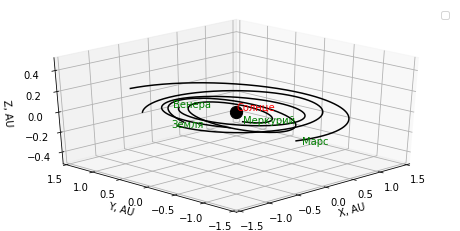

In [ ]:
plt.figure(figsize=(8,4))  

ax = plt.gca(projection="3d")
ax.scatter(0,0,0, c='k',s=150)
ax.plot(MerEl[1,:],MerEl[2,:],MerEl[3,:], color='k')
ax.plot(VenEl[1,:],VenEl[2,:],VenEl[3,:], color='k')
ax.plot(EarEl[1,:],EarEl[2,:],EarEl[3,:], color='k')
ax.plot(MarEl[1,:],MarEl[2,:],MarEl[3,:], color='k')

ax.text(0.1, 0.1, 0.0, "Солнце", color='r')
ax.text(1.1*yMer0[0],1.1*yMer0[1],1.1*yMer0[2], "Меркурий", color='g')
ax.text(1.1*yVen0[0],1.1*yVen0[1],1.1*yVen0[2], "Венера", color='g')
ax.text(1.1*yEar0[0],1.1*yEar0[1],1.1*yEar0[2], "Земля", color='g')
ax.text(1.1*yMar0[0],1.1*yMar0[1],1.1*yMar0[2], "Марс", color='g')

ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel('X, AU')
ax.set_ylabel('Y, AU')
ax.set_zlabel('Z, AU')
ax.azim = 225 
plt.show()

Результаты интегрирования полученные с помощью метода Рунге-Кутты 2-го порядка:

No handles with labels found to put in legend.


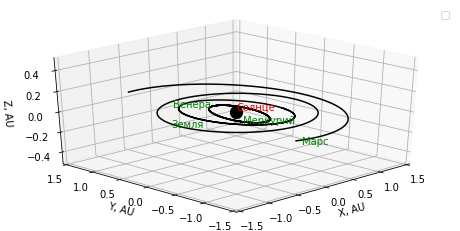

In [ ]:
plt.figure(figsize=(8,4))  

ax = plt.gca(projection="3d")
ax.scatter(0,0,0, c='k',s=150)
ax.plot(MerRK2[1,:],MerRK2[2,:],MerRK2[3,:], color='k')
ax.plot(VenRK2[1,:],VenRK2[2,:],VenRK2[3,:], color='k')
ax.plot(EarRK2[1,:],EarRK2[2,:],EarRK2[3,:], color='k')
ax.plot(MarRK2[1,:],MarRK2[2,:],MarRK2[3,:], color='k')

ax.text(0.1, 0.1, 0.0, "Солнце", color='r')
ax.text(1.1*yMer0[0],1.1*yMer0[1],1.1*yMer0[2], "Меркурий", color='g')
ax.text(1.1*yVen0[0],1.1*yVen0[1],1.1*yVen0[2], "Венера", color='g')
ax.text(1.1*yEar0[0],1.1*yEar0[1],1.1*yEar0[2], "Земля", color='g')
ax.text(1.1*yMar0[0],1.1*yMar0[1],1.1*yMar0[2], "Марс", color='g')

ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel('X, AU')
ax.set_ylabel('Y, AU')
ax.set_zlabel('Z, AU')
ax.azim = 225 
plt.show()

No handles with labels found to put in legend.


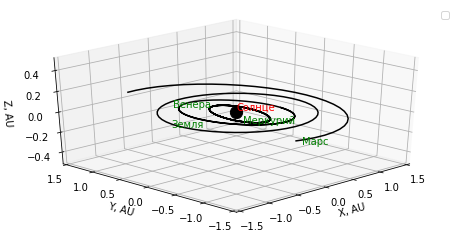

In [ ]:
plt.figure(figsize=(8,4))  

ax = plt.gca(projection="3d")
ax.scatter(0,0,0, c='k',s=150)
ax.plot(MerODE[:,0],MerODE[:,1],MerODE[:,2], color='k')
ax.plot(VenODE[:,0],VenODE[:,1],VenODE[:,2], color='k')
ax.plot(EarODE[:,0],EarODE[:,1],EarODE[:,2], color='k')
ax.plot(MarODE[:,0],MarODE[:,1],MarODE[:,2], color='k')

ax.text(0.1, 0.1, 0.0, "Солнце", color='r')
ax.text(1.1*yMer0[0],1.1*yMer0[1],1.1*yMer0[2], "Меркурий", color='g')
ax.text(1.1*yVen0[0],1.1*yVen0[1],1.1*yVen0[2], "Венера", color='g')
ax.text(1.1*yEar0[0],1.1*yEar0[1],1.1*yEar0[2], "Земля", color='g')
ax.text(1.1*yMar0[0],1.1*yMar0[1],1.1*yMar0[2], "Марс", color='g')

ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel('X, AU')
ax.set_ylabel('Y, AU')
ax.set_zlabel('Z, AU')
ax.azim = 225 
plt.show()

# Упражнение 1. Моделирование Математического маятника.
(https://en.wikipedia.org/wiki/Pendulum_(mathematics))

$$\frac {d^{2}\theta }{dt^{2}}+{\frac {g}{\ell }}\sin \theta =0$$

или в виде системы:

$$\frac {d\theta }{dt}=\omega$$
$$\frac {d\omega }{dt}=-{\frac {g}{\ell }}\sin \theta$$

In [ ]:
def fPendulum(x,y,par):
    # x - независимая переменная
    # y - зависимые переменные
    # par - вектор параметров
        
    f  = np.zeros(2)
    
#   ...    
    
    return f

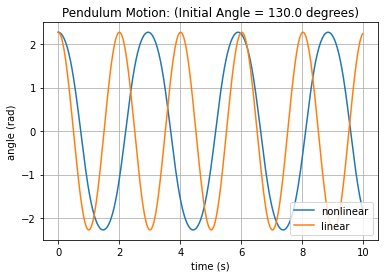

In [ ]:
import numpy as np 
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt 


# define the equations
def equations(y0, t):
	theta, x = y0
	f = [x, -(g/l) * sin(theta)]
	return f

def plot_results(time, theta1, theta2):
	plt.plot(time, theta1[:,0])
	plt.plot(time, theta2)

	s = '(Initial Angle = ' + str(initial_angle) + ' degrees)'
	plt.title('Pendulum Motion: ' + s)
	plt.xlabel('time (s)')
	plt.ylabel('angle (rad)')
	plt.grid(True)
	plt.legend(['nonlinear', 'linear'], loc='lower right')
	plt.show()

# parameters
g = 9.81
l = 1.0

time = np.arange(0, 10.0, 0.025)

# initial conditions
initial_angle = 130.0
theta0 = np.radians(initial_angle)
x0 = np.radians(0.0)

# find the solution to the nonlinear problem
theta1 = odeint(equations, [theta0, x0],  time)

# find the solution to the linear problem
w = np.sqrt(g/l)
theta2 = [theta0 * cos(w*t) for t in time]

# plot the results
plot_results(time, theta1, theta2)

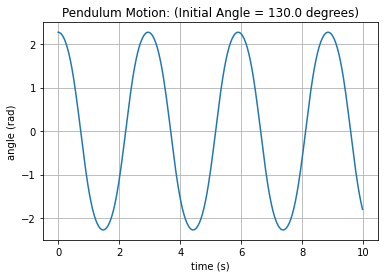

In [ ]:
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt
# define the equations
def equations(y0, t):
  theta, x = y0
  f = [x, -(g/l) * sin(theta)]
  return f
def plot_results(time, theta1):
  plt.plot(time, theta1[:,0])
  s = '(Initial Angle = ' + str(initial_angle) + ' degrees)'
  plt.title('Pendulum Motion: ' + s)
  plt.xlabel('time (s)')
  plt.ylabel('angle (rad)')
  plt.grid(True)
# parameters
g = 9.81
l = 1.0
time = np.arange(0, 10.0, 0.025)
# initial conditions
initial_angle = 130.0
theta0 = np.radians(initial_angle)
x0 = np.radians(0.0)
# find the motion of simple pendulum
theta1 = odeint(equations, [theta0, x0], time)
# plot the results
plot_results(time, theta1)

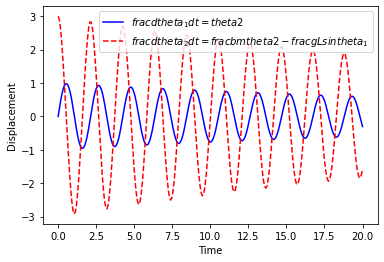

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
from scipy.integrate import odeint

def model(theta,t,b,g,l,m,):
	theta1 = theta[0]
	theta2 = theta[1]
	dtheta1_dt = theta2
	dtheta2_dt = -b/m*theta2 - (g/l)*(math.sin(theta1))
	dtheta_dt = [dtheta1_dt,dtheta2_dt]
	return dtheta_dt
#Inputs	
# damping co efficient
b = 0.05 
# gravity
g = 9.81 
# length
l = 1    
# mass hanging 
m = 1  

# initial condition
#angular displacement and angular velocity
theta_0 = [0,3] 

# time points
t = np.linspace(0,20,250)

# solve	
theta = odeint(model,theta_0,t,args = (b,g,l,m))

plt.plot(t,theta[:,0],'b-',label=r'$frac{dtheta_1}{dt}=theta2$')
plt.plot(t,theta[:,1],'r--',label=r'$frac{dtheta_2}{dt}=frac{b}{m}theta2-frac{g}{L}sintheta_1$')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend(loc='best')
plt.show()

https://skill-lync.com/student-projects/simple-pendulum-solving-second-oder-ode-with-python
Steps involved in the program and the explanation as follows:


from scipy.Integrate import odeint = Scipy module let us differentiation and integration functions.

Import numpy as np = numpy module lets us use some math functions like 'linspace'

def = it is a defines the function or it calls for the function.

A function called 'model ' is created to define the ode equations.

Simple pendulum second order ODE is converted into first order ODE to make things simple.

Inputs and intial conditions are provides
Initial conditions are displacement and velocity.

timestep size is provided 
theta is created to call the function. we have to be careful call the function because the range of errors.

For the plot between the diaplacement, velocity vs time we have used 1st program

Second program is used for the animation purpose.

Each point has to be created in animation to tell the program where the string and the ball are at that moment of time.

Python created random filename which will become diffcult to stich all the plot as one gif file. So, we have created at count 'ct' which increase by 1 along with timestep and this count can be used in naming the file.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


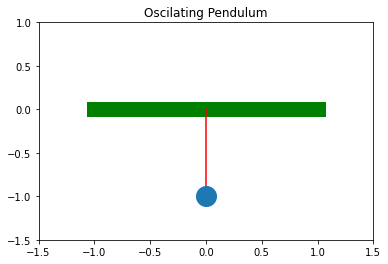

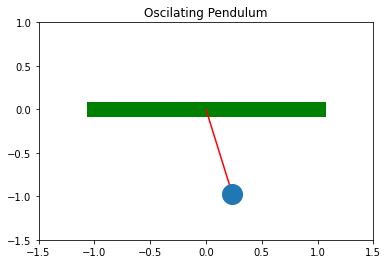

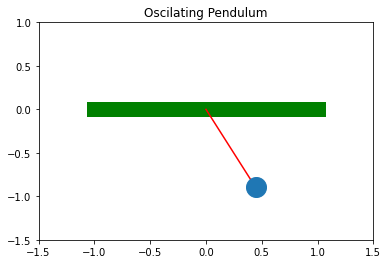

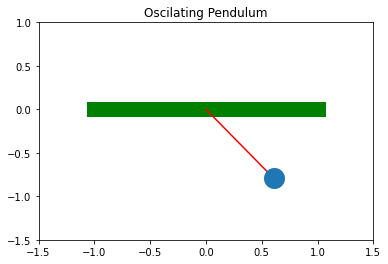

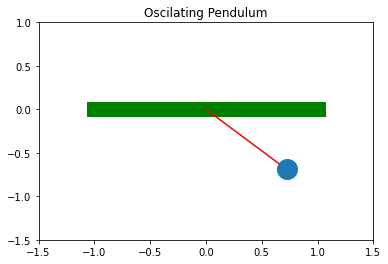

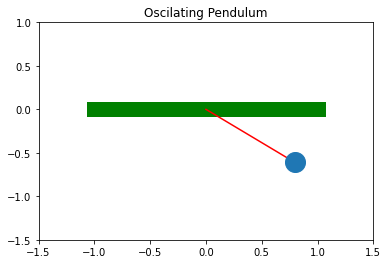

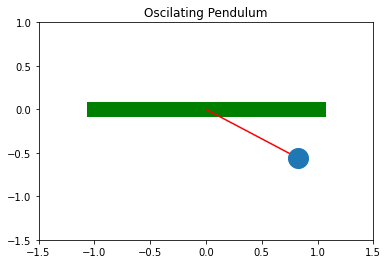

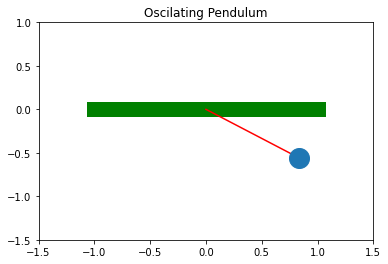

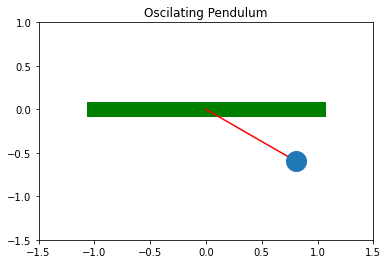

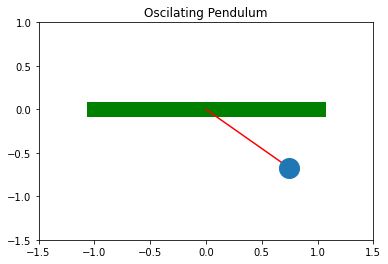

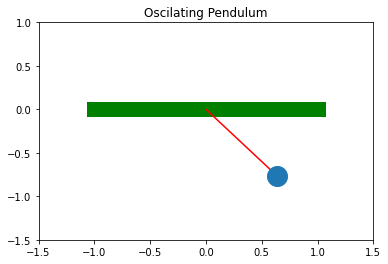

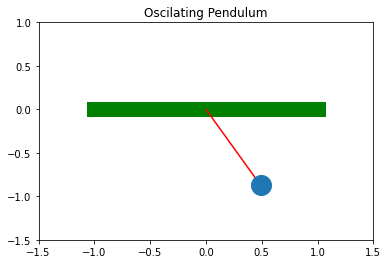

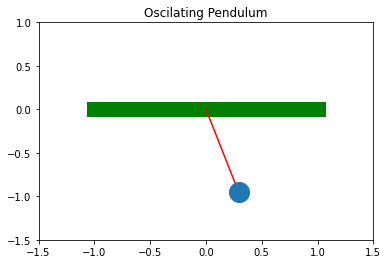

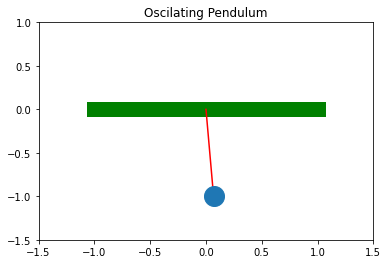

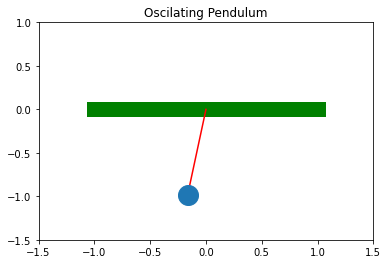

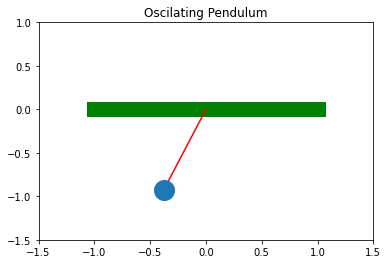

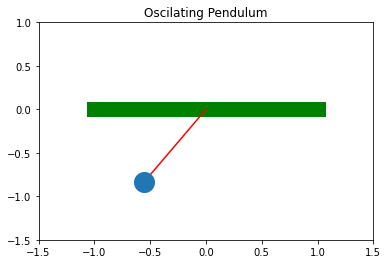

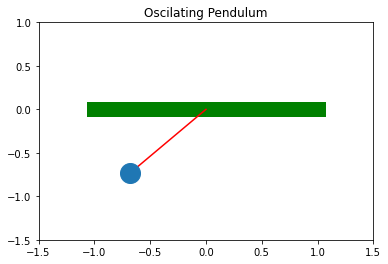

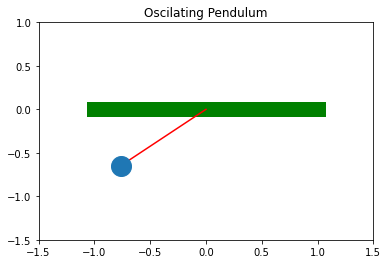

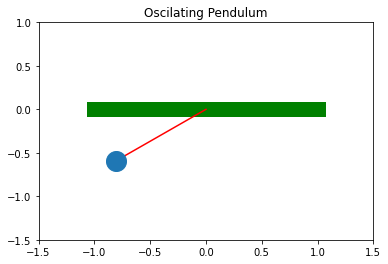

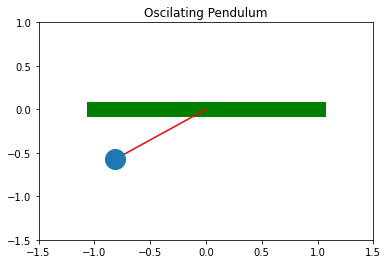

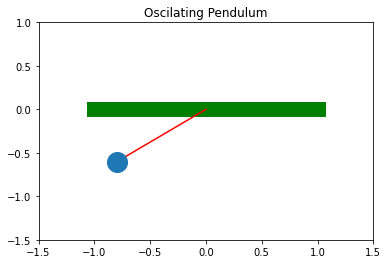

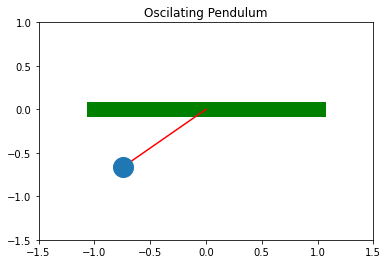

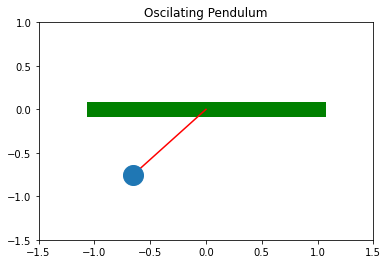

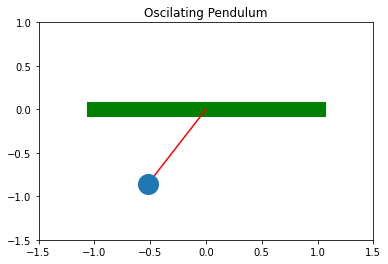

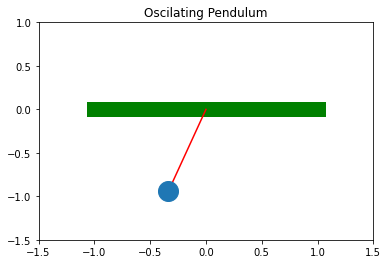

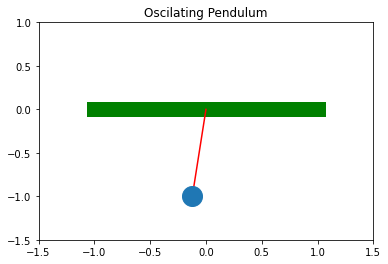

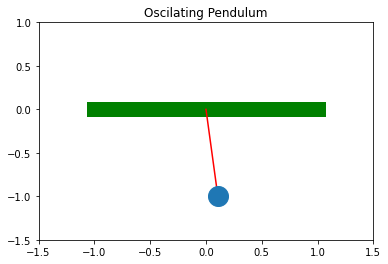

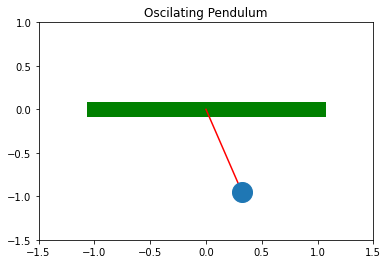

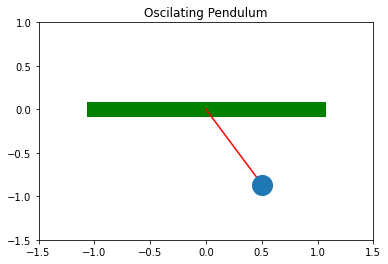

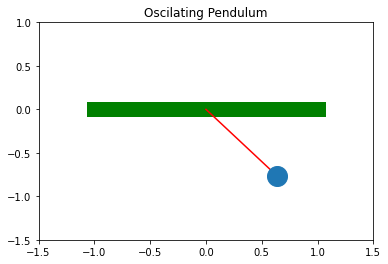

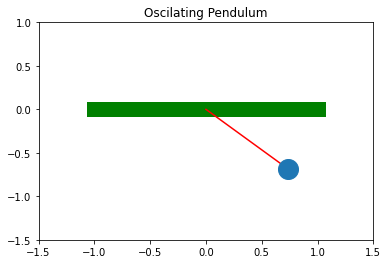

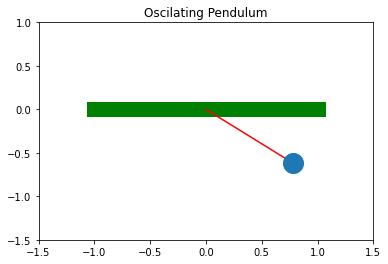

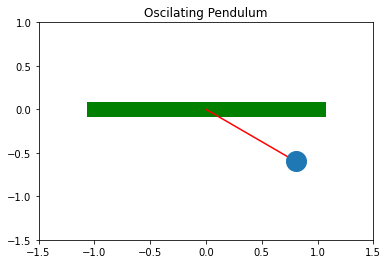

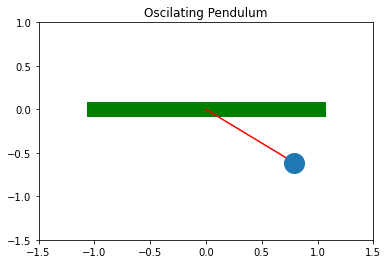

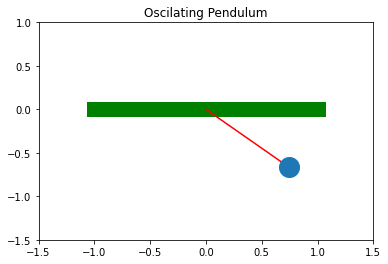

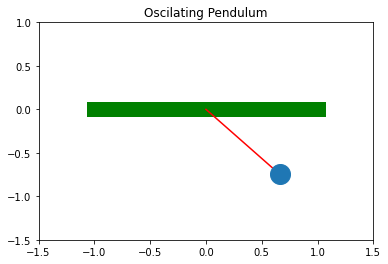

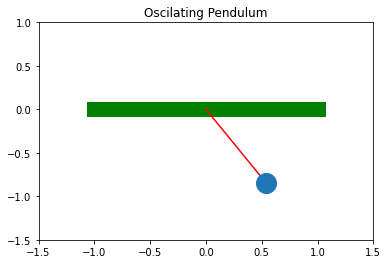

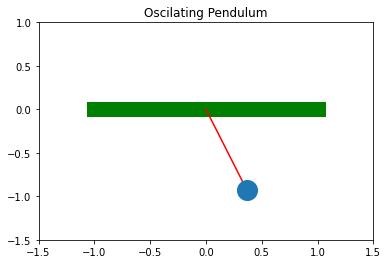

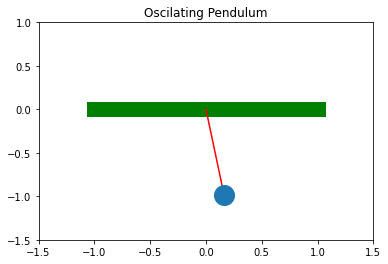

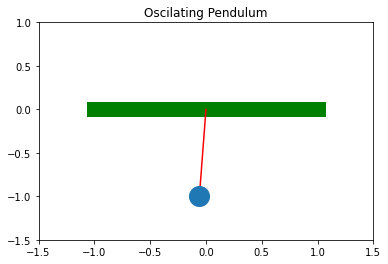

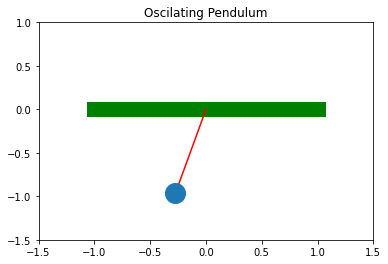

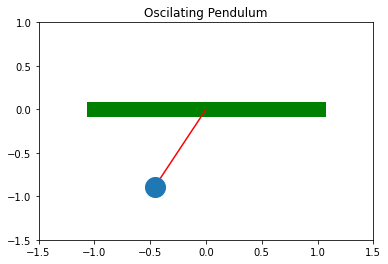

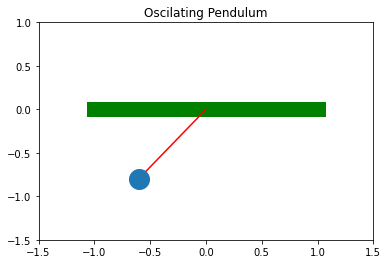

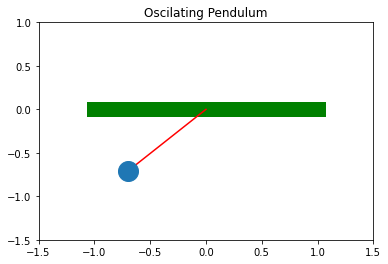

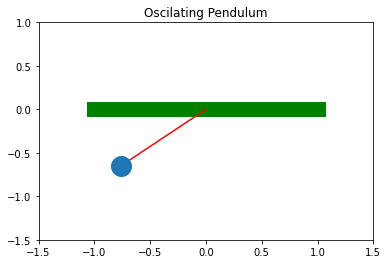

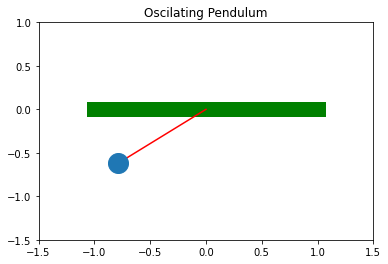

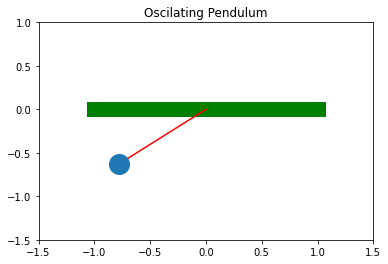

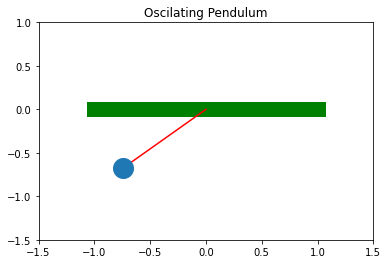

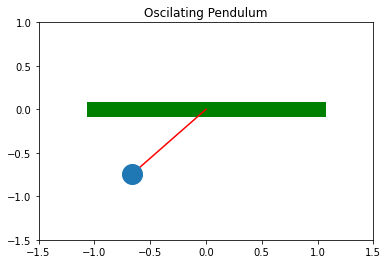

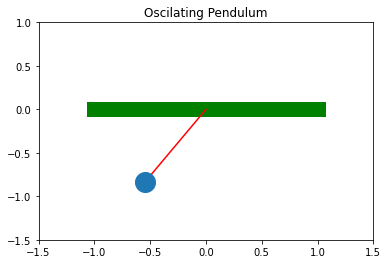

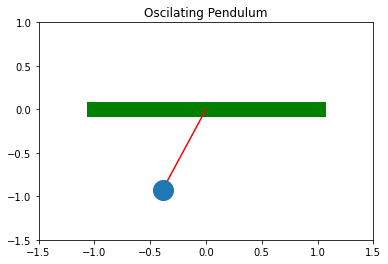

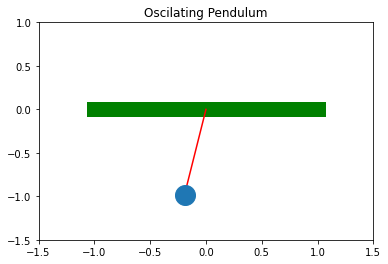

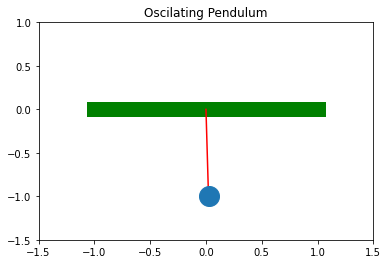

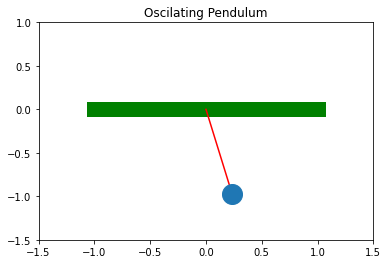

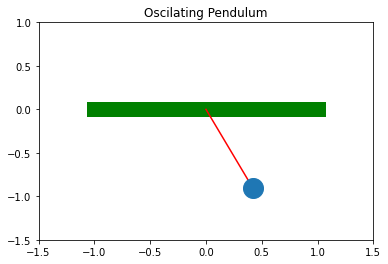

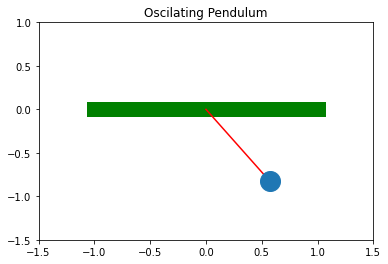

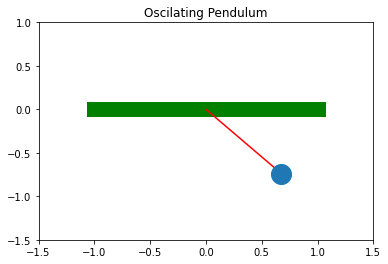

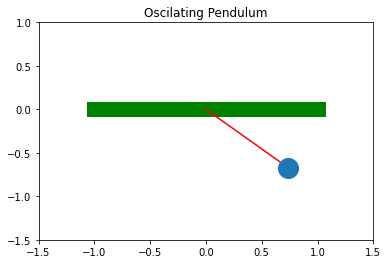

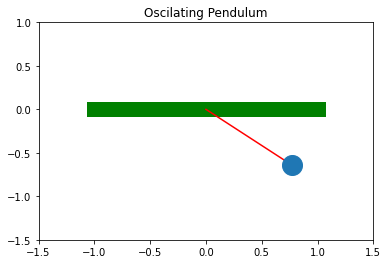

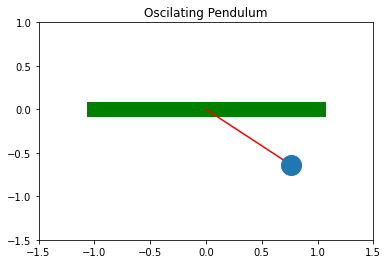

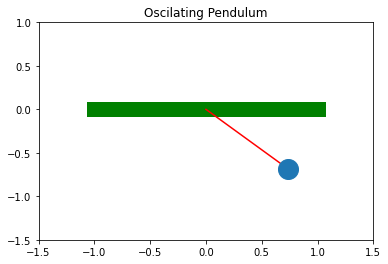

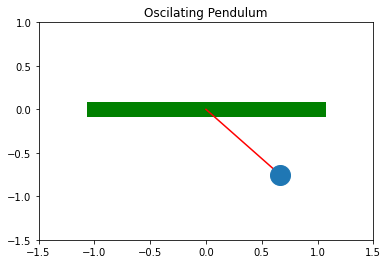

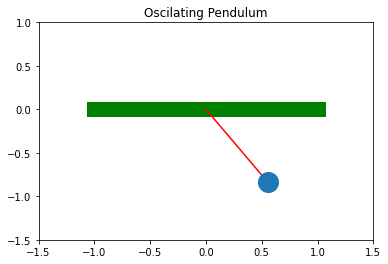

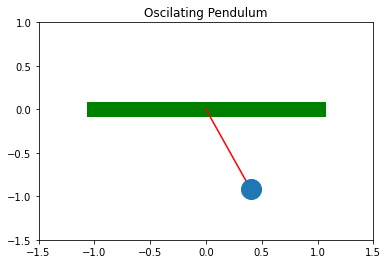

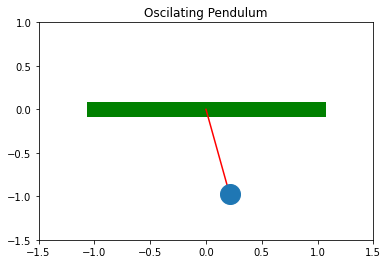

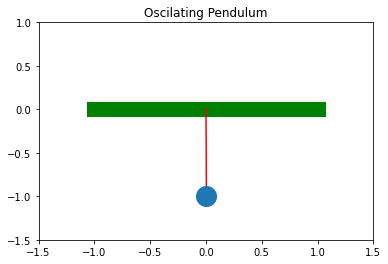

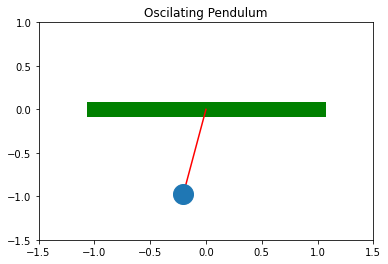

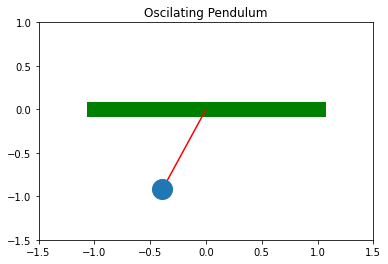

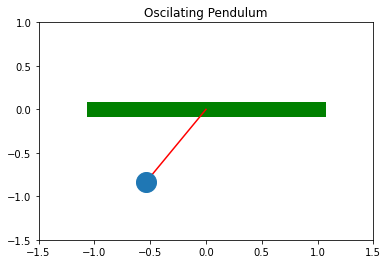

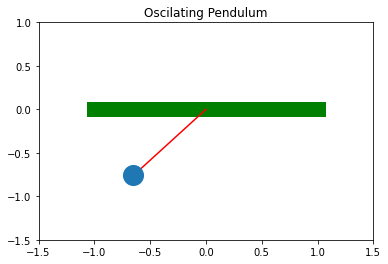

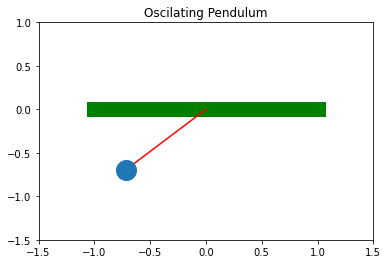

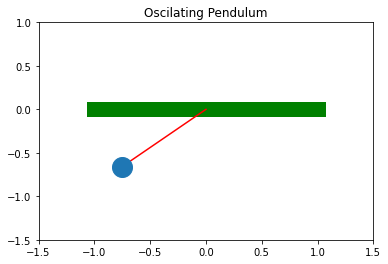

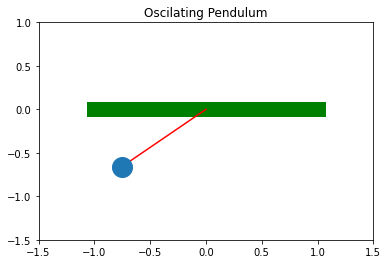

Error in callback <function flush_figures at 0x7faa17812950> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def motion(theta,t,b,g,l,m,):
	theta1 = theta[0]
	theta2 = theta[1]
	dtheta1_dt = theta2
	dtheta2_dt = -b/m*theta2 - (g/l)*(math.sin(theta1))
	dtheta_dt = [dtheta1_dt,dtheta2_dt]
	return dtheta_dt
#Inputs	
# damping co efficient
b = 0.05 
# gravity
g = 9.81 
# length
l = 1    
# mass hanging 
m = 1  

# initial condition
#angular displacement and angular velocity
theta_0 = [0,3] 

# time points
t = np.linspace(0,20,250)

# solve	ode
theta = odeint(motion,theta_0,t,args = (b,g,l,m))

# animation script
ct = 1
x0 = 0
y0 = 0

for i in theta[:,0]:
	x1 = 1*math.sin(i)
	y1 = -1*math.cos(i)

	filename = '%05d.png' %ct
	ct = ct + 1

	plt.figure()
	plt.plot([-1,1],[0,0],"green",linewidth=15)
	plt.plot([x0,x1],[y0,y1],"red")
	plt.xlim([-1.5,1.5])
	plt.ylim([-1.5,1.0])
	plt.plot(x1,y1,'o',markersize =20)
	plt.title('Oscilating Pendulum')
	plt.savefig(filename)

# Упражнение 2. Атрактор Лоренца

In [ ]:
def Lorenc(t, x, par):
    # par = [sig, r, b]
    f = zeros(3)
    
    f[0]=par[0]*(x[1]-x[0])
    f[1]=par[1]*x[0]-x[1]-x[0]*x[2]   
    f[2]=x[0]*x[1]-par[2]*x[2]
    
    return f

In [ ]:
par = np.array([10.,28.0,8./3.]) # r= 0 - 1 - 1.345 - 13.926563233 - 24.06 - 24.7368 - 30.1 - 313 +
t=0

xa10=[1,1,1]
xa20=[-1,-1,1]
xSt = np.array([ [np.sqrt(par[2]*(par[1]-1)), np.sqrt(par[2]*(par[1]-1)), par[1]-1],
                 [-np.sqrt(par[2]*(par[1]-1)), -np.sqrt(par[2]*(par[1]-1)), par[1]-1],
                 [0 ,0, 0]])

# Домашнее задание (базовое):

# Задание 1.

Напишите программу реализующую Метод Симпсона (формулу Симпсона) для нахождения определённого интеграла (https://ru.wikipedia.org/wiki/Формула_Симпсона).

In [ ]:
import numpy as np
import math as math
from math import sqrt
 
def n_kr(n):
    while n%4 != 0:
        n = n + 1
    return n
 
e = 0.001   #Заданная точность
a = 1   #Нижняя граница интегрирования
b = 8   #Верхняя граница интегрирования
#Производим рассчет шага интегрирования
n_np = round((b-a)/(e**(0.25)))
n = n_kr(n_np)  #Число итераций(округляем до первого числа, кратного четырем)
h = round((b-a)/n, 3)#Шаг интегрирования
#Заполняем массив данных x и f(x)
 
x = np.arange(1, 8.01, h).tolist()  #Заполняем список x числами от 1 до 8 с шагом h
k = 0
fx = []  #Создаем пустой список значений функции f(x)
for k in range(0,1):
    for i in x:
        zn = sqrt(pow(i,3)+16)  #Считаем значение функции f(x) в точках из списка x, функция задается самостоятельно
        fx.append(zn)   #Заполняем список fx значениями функции f(x) в указанных точках
 
Ih1_s1 = 0  #Вспомогательная переменная, элемент формулы Симпсона
Ih1_s2 = 0  #Вспомогательная переменная, элемент формулы Симпсона
 
for i in range(0,40):
    if i%2 !=0:
        Ih1_s1 += fx[i] #Ссумируем значения функции f(x) в точках с четным номером
    if i%2 == 0 and i!=40 and i!= 0:
        Ih1_s2 += fx[i] #Ссумируем значения функции f(x) в точках с нечетным номером
 
Ih1 = h/3*(fx[0]+fx[40]+4*(Ih1_s1)+2*(Ih1_s2))  #Считаем интеграл с шагом h
 
Ih2_s1 = 0  #Вспомогательная переменная, элемент формулы Симпсона
Ih2_s2 = 0  #Вспомогательная переменная, элемент формулы Симпсона
 
for i in range(2,39,4):
    Ih2_s1 += fx[i]
 
for i in range(4, 37, 4):
    Ih2_s2 += fx[i]
 
Ih2 = 2*h/3*(fx[0]+fx[40]+4*(Ih2_s1)+2*(Ih2_s2))    #Считаем интеграл с шагом 2h
 
print('Значение определенного интеграла, посчитаного с шагом h равно', Ih1)
print('Значение определенного интеграла, посчитанного с шагом 2h равно', Ih2)
 
Ih_check = abs(Ih1-Ih2)/15  #Оценка точности проведенных вычислений методом Ругне Кутты
 
if Ih_check < e:
    print('Интеграл посчитан верно, точность составила:', Ih_check, ', что выше, чем заданная точность', e)
else:
    print('Интеграл посчитан неверно, точность составила:', Ih_check, ', что ниже, чем заданная точность', e)

Значение определенного интеграла, посчитаного с шагом h равно 79.68589329759635
Значение определенного интеграла, посчитанного с шагом 2h равно 79.68584799497074
Интеграл посчитан верно, точность составила: 3.0201750405467466e-06 , что выше, чем заданная точность 0.001


In [ ]:
import sympy
 
x = sympy.Symbol('x')
 
f_x = x / (x**4 + 4)
 
 
def sympson(left, right, n, function):
    h = (right - left) / (2 * n)
 
    tmp_sum = float(function.subs({x: left})) +\
        float(function.subs({x: right}))
 
    for step in range(1, 2 * n):
        if step % 2 != 0:
            tmp_sum += 4 * float(function.subs({x: left + step * h}))
        else:
            tmp_sum += 2 * float(function.subs({x: left + step * h}))
 
    return tmp_sum * h / 3
 
 
print(sympson(0, 5, 5, f_x))

0.3717079613550202


# Задание 2.

Сравните точность работы имеющихся программ на примере вычисления интеграла из 2-го задания. Решение оформите ввиде таблицы:

n   |   прямоугольники      |      трапеции      |     Симпсон     |    точное           

In [ ]:
class Quadrature:
    """Базовые определения для квадратурных формул"""
    __sum = 0.0
    __nseg = 1  # число отрезков разбиения
    __ncalls = 0 # считает число вызовов интегрируемой функции

    def __restart(func, x0, x1, nseg0, reset_calls = True):
        """Обнуление всех счётчиков и аккумуляторов.
           Возвращает интеграл методом трапеций на начальном разбиении"""
        if reset_calls:
            Quadrature.__ncalls = 0
        Quadrature.__nseg = nseg0
        # вычисление суммы для метода трапеций с начальным числом отрезков разбиения nseg0
        Quadrature.__sum = 0.5 * (func(x0) + func(x1))
        dx = 1.0 * (x1 - x0) / nseg0
        for i in range(1, nseg0):
            Quadrature.__sum += func(x0 + i * dx)

        Quadrature.__ncalls += 1 + nseg0
        return Quadrature.__sum * dx

    def __double_nseg(func, x0, x1):
        """Вдвое измельчает разбиение.
           Возвращает интеграл методом трапеций на новом разбиении"""
        nseg = Quadrature.__nseg
        dx = (x1 - x0) / nseg
        x = x0 + 0.5 * dx
        i = 0
        AddedSum = 0.0
        for i in range(nseg):
            AddedSum += func(x + i * dx)

        Quadrature.__sum += AddedSum
        Quadrature.__nseg *= 2
        Quadrature.__ncalls += nseg
        return Quadrature.__sum * 0.5 * dx

    def trapezoid(func, x0, x1, rtol = 1e-10, nseg0 = 1):
        """Интегрирование методом трапеций с заданной точностью.
           rtol - относительная точность,
           nseg0 - число отрезков начального разбиения"""
        ans = Quadrature.__restart(func, x0, x1, nseg0)
        old_ans = 0.0
        err_est = max(1, abs(ans))
        while (err_est > abs(rtol * ans)):
            old_ans = ans
            ans = Quadrature.__double_nseg(func, x0, x1)
            err_est = abs(old_ans - ans)

        #print("Total function calls: " + str(Quadrature.__ncalls))
        return ans

    def simpson(func, x0, x1, rtol = 1.0e-10, nseg0 = 1):
        """Интегрирование методом парабол с заданной точностью.
           rtol - относительная точность,
           nseg0 - число отрезков начального разбиения"""
        old_trapez_sum = Quadrature.__restart(func, x0, x1, nseg0)
        new_trapez_sum = Quadrature.__double_nseg(func, x0, x1)
        ans = (4 * new_trapez_sum - old_trapez_sum) / 3
        old_ans = 0.0
        err_est = max(1, abs(ans))
        while (err_est > abs(rtol * ans)):
            old_ans = ans
            old_trapez_sum = new_trapez_sum
            new_trapez_sum = Quadrature.__double_nseg(func, x0, x1)
            ans = (4 * new_trapez_sum - old_trapez_sum) / 3
            err_est = abs(old_ans - ans)

        #print("Total function calls: " + str(Quadrature.__ncalls))
        return ans

In [ ]:
import math

trapez = Quadrature.trapezoid(lambda x: 2 * x + 1 / math.sqrt(x + 1 / 16), 0, 1.5, rtol=1e-9)
simpss = Quadrature.simpson(lambda x: 2 * x + 1 / math.sqrt(x + 1 / 16), 0, 1.5, rtol=1e-9)
print(' | трапеции          |      Симпсон       |', '\n','|', trapez, '|', simpss, '|')

 | трапеции          |      Симпсон       | 
 | 4.250000001385811 | 4.2500000000490985 |


In [ ]:
class Quadrature:
    """Базовые определения для квадратурных формул"""
    __sum = 0.0
    __nseg = 1  # число отрезков разбиения
    __ncalls = 0 # считает число вызовов интегрируемой функции

    def __restart(func, x0, x1, nseg0, reset_calls = True):
        """Обнуление всех счётчиков и аккумуляторов.
           Возвращает интеграл методом трапеций на начальном разбиении"""
        if reset_calls:
            Quadrature.__ncalls = 0
        Quadrature.__nseg = nseg0
        # вычисление суммы для метода трапеций с начальным разбиением на nseg0 отрезков
        Quadrature.__sum = 0.5 * (func(x0) + func(x1))
        dx = 1.0 * (x1 - x0) / nseg0
        for i in range(1, nseg0):
            Quadrature.__sum += func(x0 + i * dx)

        Quadrature.__ncalls += 1 + nseg0
        return Quadrature.__sum * dx

    def __double_nseg(func, x0, x1):
        """Вдвое измельчает разбиение.
           Возвращает интеграл методом трапеций на новом разбиении"""
        nseg = Quadrature.__nseg
        dx = (x1 - x0) / nseg
        x = x0 + 0.5 * dx
        i = 0
        AddedSum = 0.0
        for i in range(nseg):
            AddedSum += func(x + i * dx)

        Quadrature.__sum += AddedSum
        Quadrature.__nseg *= 2
        Quadrature.__ncalls += nseg
        return Quadrature.__sum * 0.5 * dx

    def romberg(func, x0, x1, rtol = 1e-10, nseg0 = 1, maxcol = 5, reset_calls = True):
        """Интегрирование методом Ромберга
           nseg0 - начальное число отрезков разбиения
           maxcol - максимальный столбец таблицы"""
        # инициализация таблицы
        Itable = [[Quadrature.__restart(func, x0, x1, nseg0, reset_calls)]]
        i = 0
        maxcol = max(0, maxcol)
        ans = Itable[i][i]
        error_est = max(1, abs(ans))
        while (error_est > abs(rtol * ans)):
            old_ans = ans
            i += 1
            d = 4.0
            ans_col = min(i, maxcol)
            Itable.append([Quadrature.__double_nseg(func, x0, x1)] * (ans_col + 1))
            for j in range(0, ans_col):
                diff = Itable[i][j] - Itable[i - 1][j]
                Itable[i][j + 1] = Itable[i][j] + diff / (d - 1.0)
                d *= 4.0

            ans = Itable[i][ans_col]
            if (maxcol <= 1): # методы трапеций и парабол обрабатываются отдельно
                error_est = abs(ans - Itable[i - 1][-1])
            elif (i > maxcol):
                error_est = abs(ans - Itable[i][min(i - maxcol - 1, maxcol - 1)])
            else:
                error_est = abs(ans - Itable[i - 1][i - 1])

        print("Total function calls: " + str(Quadrature.__ncalls))
        return ans

In [ ]:
trapez = Quadrature.romberg(lambda x: 2 * x + 1 / math.sqrt(x + 1/16), 0, 1.5, rtol=1e-9, maxcol = 0) # трапеции
simpss = Quadrature.romberg(lambda x: 2 * x + 1 / math.sqrt(x + 1/16), 0, 1.5, rtol=1e-9, maxcol = 1) # параболы
rombb = Quadrature.romberg(lambda x: 2 * x + 1 / math.sqrt(x + 1/16), 0, 1.5, rtol=1e-9, maxcol = 4)
print(' | трапеции          |      Симпсон       |    Ромберг        |', '\n', '-'*62, '\n','|', trapez, '|', simpss, '|', rombb, '|')

Total function calls: 65537
Total function calls: 2049
Total function calls: 257
 | трапеции          |      Симпсон       |    Ромберг        | 
 -------------------------------------------------------------- 
 | 4.250000001385811 | 4.2500000000490985 | 4.250000001644076 |


In [ ]:
from scipy import integrate
x = np.arange(0, 10)
y = np.arange(0, 10)
integrate.quad(lambda x: x**3, 0, 9)[0], integrate.simps(y, x)



(1640.25, 40.5)

# Задание 3. Численное решение ОДУ.

Напишите программу для интегрирования системы ОДУ:
- неявным методом Эйлера,
- явным методом Рунге-Кутты 4-го порядка.

In [ ]:
#реализация явного метода Эйлера
import numpy as np
import matplotlib.pyplot as plt

def euler(F, u0, tau, T):
    N_t = int(round(T/tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)
    for n in range(N_t):
        u[n+1] = u[n] + tau*F_(t[n], u[n])

    return u, t

In [ ]:
#реализация неявного метода Эйлера
def backward_euler(F, u0, tau, T):
    from scipy import optimize
    N_t = int(round(T/tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)

    def Phi(z, t, v):
        return z - tau*F_(t, z) - v
    
    for n in range(N_t):
        u[n+1] = optimize.fsolve(Phi, u[n], args=(t[n], u[n]))

    return u, t

dt = 0.5
x 		 y (Euler) 	 y (analytical)
0.000000 	 1.000000 	 1.000000
0.500000 	 1.000000 	 1.133148
1.000000 	 1.250000 	 1.648721
1.500000 	 1.875000 	 3.080217
2.000000 	 3.281250 	 7.389056
dt = 0.5
x 		 y (rk4) 	 y (analytical)
0.000000 	 1.000000 	 1.000000
0.500000 	 1.125000 	 1.133148
1.000000 	 1.599609 	 1.648721
1.500000 	 2.849304 	 3.080217
2.000000 	 6.277373 	 7.389056


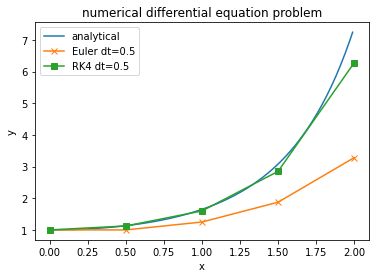

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp  # exponential function

dy = lambda x, y: x * y
f = lambda x: exp(x ** 2 / 2)  # analytical solution function
x_final = 2

# analytical solution
x_a = np.arange(0, x_final, 0.01)
y_a = np.zeros(len(x_a))
for i in range(len(x_a)):
    y_a[i] = f(x_a[i])

plt.plot(x_a, y_a, label="analytical")

# Container for step sizes dt /dt
dt = 0.5

x = 0
y = 1
print("dt = " + str(dt))
print("x \t\t y (Euler) \t y (analytical)")
print("%f \t %f \t %f" % (x, y, f(x)))

n = int((x_final - x) / dt)

x_e = np.zeros(n + 1)
y_e = np.zeros(n + 1)
x_e[0] = x
y_e[0] = y

#Plot Euler's method
for i in range(n):
    y += dy(x, y) * dt
    x += dt
    print("%f \t %f \t %f" % (x, y, f(x)))
    x_e[i + 1] = x
    y_e[i + 1] = y

plt.plot(x_e, y_e, "x-", label="Euler dt=" + str(dt))

###################33
# Runge-Kutta's method 4'nd order (RK4)
x = 0
y = 1
print("dt = " + str(dt))
print("x \t\t y (rk4) \t y (analytical)")
print("%f \t %f \t %f" % (x, y, f(x)))

n = int((x_final - x) / dt)

x_r = np.zeros(n + 1)
y_r = np.zeros(n + 1)
x_r[0] = x
y_r[0] = y

# Plot the RK4
for i in range(n):
    K1 = dt*dy(x,y) # Step 1
    K2 = dt*dy(x+dt/2,y+K1/2) # Step 2
    y += K2 # Step 3
    x += dt
    print("%f \t %f \t %f" % (x, y, f(x)))
    x_r[i + 1] = x
    y_r[i + 1] = y

plt.plot(x_r, y_r, "s-", label="RK4 dt=" + str(dt))

plt.title("numerical differential equation problem")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Домашнее задание (дополнительное):

# Задание. Странности продолжаются.

Промоделируйте ещё один странные атрактор. 
(...)

# Задание. Космическое путешествие.

Используя программу для решения з. Коши и один из решателей нелинейной системы уравнений из предыдущей лабы решите краевую задачу: найдите скорость которую должен иметь относительно солнца космический корабль отлитая от Земли, что бы через 9 месяцев встретиться с Венерой. Используйте координаты планет приведённые в этой лабе.